# Test Microphone Input
This notebook tests the re-routing of audio output back into the microphone input channel on a sound card (ASUS Xonar SE 5.1) both with and without an adapter circuit bridging the connection.

## Initial setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

## Experiment details

The adapter circuit compromises the following diagram:

<img src="MicCircuit.png" alt="drawing" width="400"/>

We varied the different resistor and capacitor values as follows:

Test # |  R1  |  R2  |  R3  |  R4  |  C1  
-------|------|------|------|------|------
1      | 330  | 15k  | 3.3k | 330  | 100nF
2      | 330  | 15k  | 3.3k | 330  | 1nF
3      | 330  | 15k  | 3.3k | 330  | 10pF
4      | 330  | 15k  | 10k  | 330  | 100nF

A dummy run through the behavior setup generated tone cloud, pink noise, and pure tones in each audio channel (left/right) for each set of values. The audio output sent to left/right speakers was split into the adapter circuit above, which then sent the filtered signal to the mic input on the same sound card.

## Spectrogram results
Below, we plot the spectrogram of each test run for each of the two audio channels.

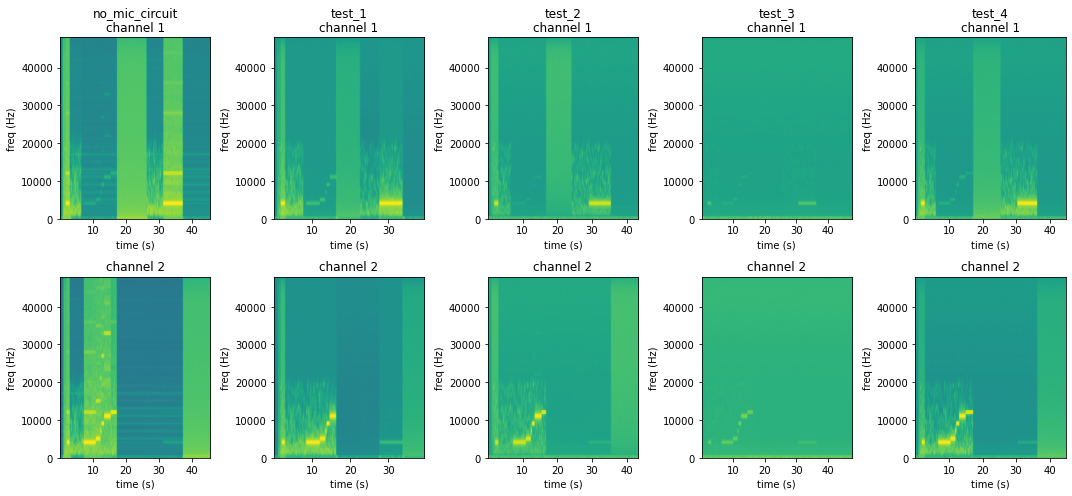

In [2]:
# Data directories for each run
data_dirs = ['no_mic_circuit', 'test_1', 'test_2', 'test_3', 'test_4']

# Create figure
fig, ax = plt.subplots(2, len(data_dirs), figsize=(15, 7))

for i, d in enumerate(data_dirs):
    # Read wav file
    fs, wf = wavfile.read('./{}/StimuliPlayback.wav'.format(d))
    assert wf.shape[1] == 2 # two channels
    
    # Plot spectrogram for each channel
    specs = []
    for j in range(wf.shape[1]):
        spec, freq, t, im = ax[j, i].specgram(wf[:, j], Fs=fs)
        specs.append(spec)
        ax[j, i].set_xlabel('time (s)')
        ax[j, i].set_ylabel('freq (Hz)')
    
    # Label columns
    ax[0, i].set_title('{}\nchannel 1'.format(d))
    ax[1, i].set_title('channel 2')

# Save figure
plt.tight_layout()
plt.savefig('./spectrograms.pdf')

Given the above figure, it appears that parameter set #4 gives the best compromise between filtering crosstalk and preserving signal amplitude.